In [44]:
#First file 
import sklearn
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [15]:
# Load files
DIRECTORY_WHERE_THIS_FILE_IS = os.path.dirname(os.path.abspath("EDA"))
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/location.csv")
df1 = pd.read_csv(DATA_PATH, parse_dates=["fecha"])

DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/demographics.csv")
df2 = pd.read_csv(DATA_PATH, parse_dates=["fecha"])

#check origin file
#DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/movement.xls")
#df3 = pd.read_excel(DATA_PATH)

In [20]:
df2

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
871315,ZA,NC,50-59,2021-07-01,0,0,0,0
871316,ZA,NC,60-69,2021-07-01,0,0,0,0
871317,ZA,NC,70-79,2021-07-01,0,0,0,0
871318,ZA,NC,80+,2021-07-01,0,0,0,0


In [22]:
#Merging
complete_df = pd.merge(df1, df2, how='left', left_on=['provincia_iso','fecha'], right_on = ['provincia_iso','fecha'])

In [24]:
#remov dupl col
complete_df= complete_df.drop(['num_casos_y'], axis=1)

In [26]:
complete_df.head()

,provincia_iso,fecha,num_casos_x,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,sexo,grupo_edad,num_hosp,num_uci,num_def
0,A,2020-01-01,0,0,0,0,0,0,H,0-9,0,0,0
1,A,2020-01-01,0,0,0,0,0,0,H,10-19,0,0,0
2,A,2020-01-01,0,0,0,0,0,0,H,20-29,0,0,0
3,A,2020-01-01,0,0,0,0,0,0,H,30-39,0,0,0
4,A,2020-01-01,0,0,0,0,0,0,H,40-49,0,0,0


In [25]:
complete_df.describe()

,num_casos_x,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,num_hosp,num_uci,num_def
count,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000
mean,131.571202,100.846337,0.164337,28.182792,0.525720,1.852018,0.423727,0.040218,0.092828
std,350.476197,274.897114,1.179355,117.225121,4.809419,21.144481,2.900997,0.338184,0.935788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,116.000000,91.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7017.000000,6602.000000,32.000000,3251.000000,115.000000,702.000000,269.000000,35.000000,100.000000


In [36]:
complete_df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [63]:
province_cases = complete_df.groupby('provincia_iso').agg({"num_casos_x":np.sum})
date_cases =  complete_df.groupby('fecha').agg({"num_casos_x":np.sum})

<AxesSubplot:xlabel='fecha'>

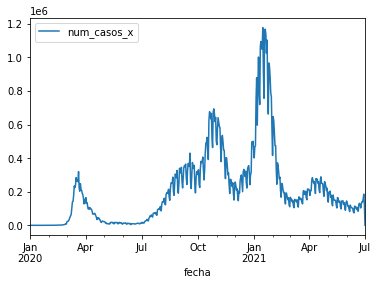

In [64]:
date_cases.plot()

In [65]:
province_cases.reset_index(inplace=True)

In [67]:
province_cases

,provincia_iso,num_casos_x
0,A,4474860
1,AB,857820
2,AL,1670130
3,AV,366840
4,B,14447550
5,BA,1529580
6,BI,3136650
7,BU,1075680
8,C,1725240
9,CA,2524860


Note that cases are not unique


<Figure size 432x288 with 0 Axes>

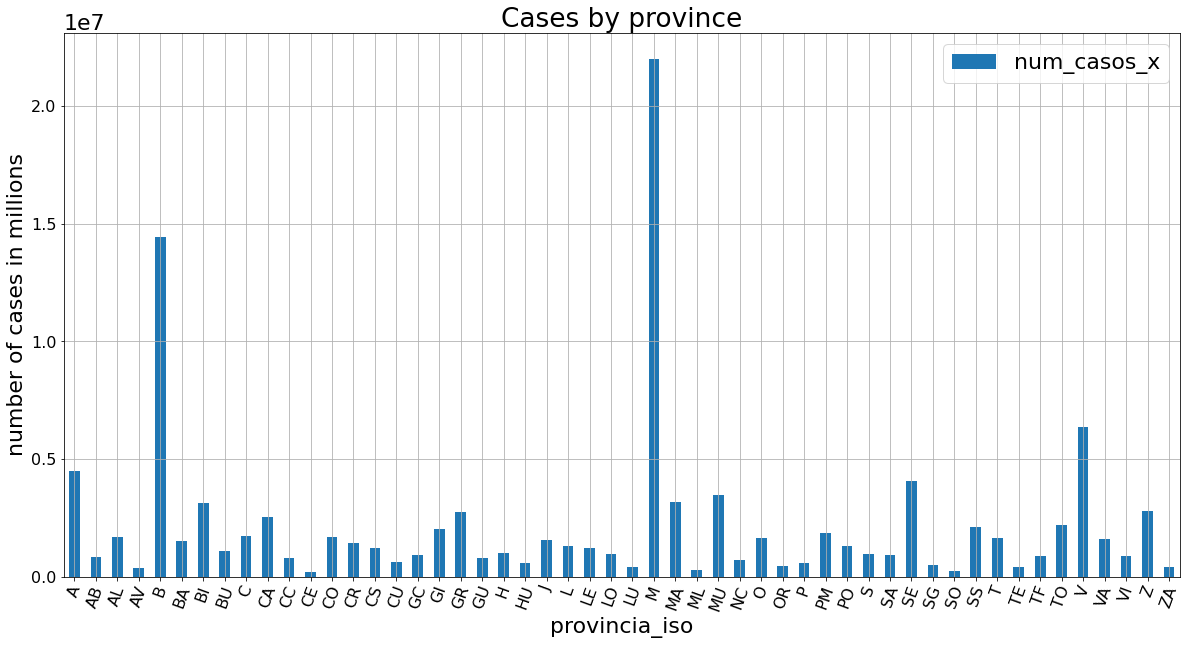

In [79]:
plt.figure()
plt.rcParams.update({'font.size': 22})
province_cases.plot.bar(x="provincia_iso", y='num_casos_x', ylabel = "number of cases in millions",rot=70, 
                        fontsize= 16,grid=True,figsize = (20,10),title="Cases by province");
print("Note that cases are not unique")